In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import ScalarFormatter
import csv
import pandas as pd
print(pd.__version__)
print(np.__version__)

2.2.2
1.26.4


In [2]:
plt.rcParams['font.family'] = 'Times New Roman' 
plt.rcParams['mathtext.fontset'] = 'stix' 
plt.rcParams["font.size"] = 12
plt.rcParams['xtick.labelsize'] = 17
plt.rcParams['ytick.labelsize'] = 17 

plt.rcParams['xtick.direction'] = 'in' 
plt.rcParams['ytick.direction'] = 'in' 
plt.rcParams['axes.grid'] = True 

plt.rcParams["xtick.minor.visible"] = True  
plt.rcParams["ytick.minor.visible"] = True  
plt.rcParams['xtick.top'] = True  
plt.rcParams['ytick.right'] = True  

plt.rcParams["legend.fancybox"] = False 
plt.rcParams["legend.framealpha"] = 1
plt.rcParams["legend.edgecolor"] = 'black'
plt.rcParams["legend.markerscale"] = 5

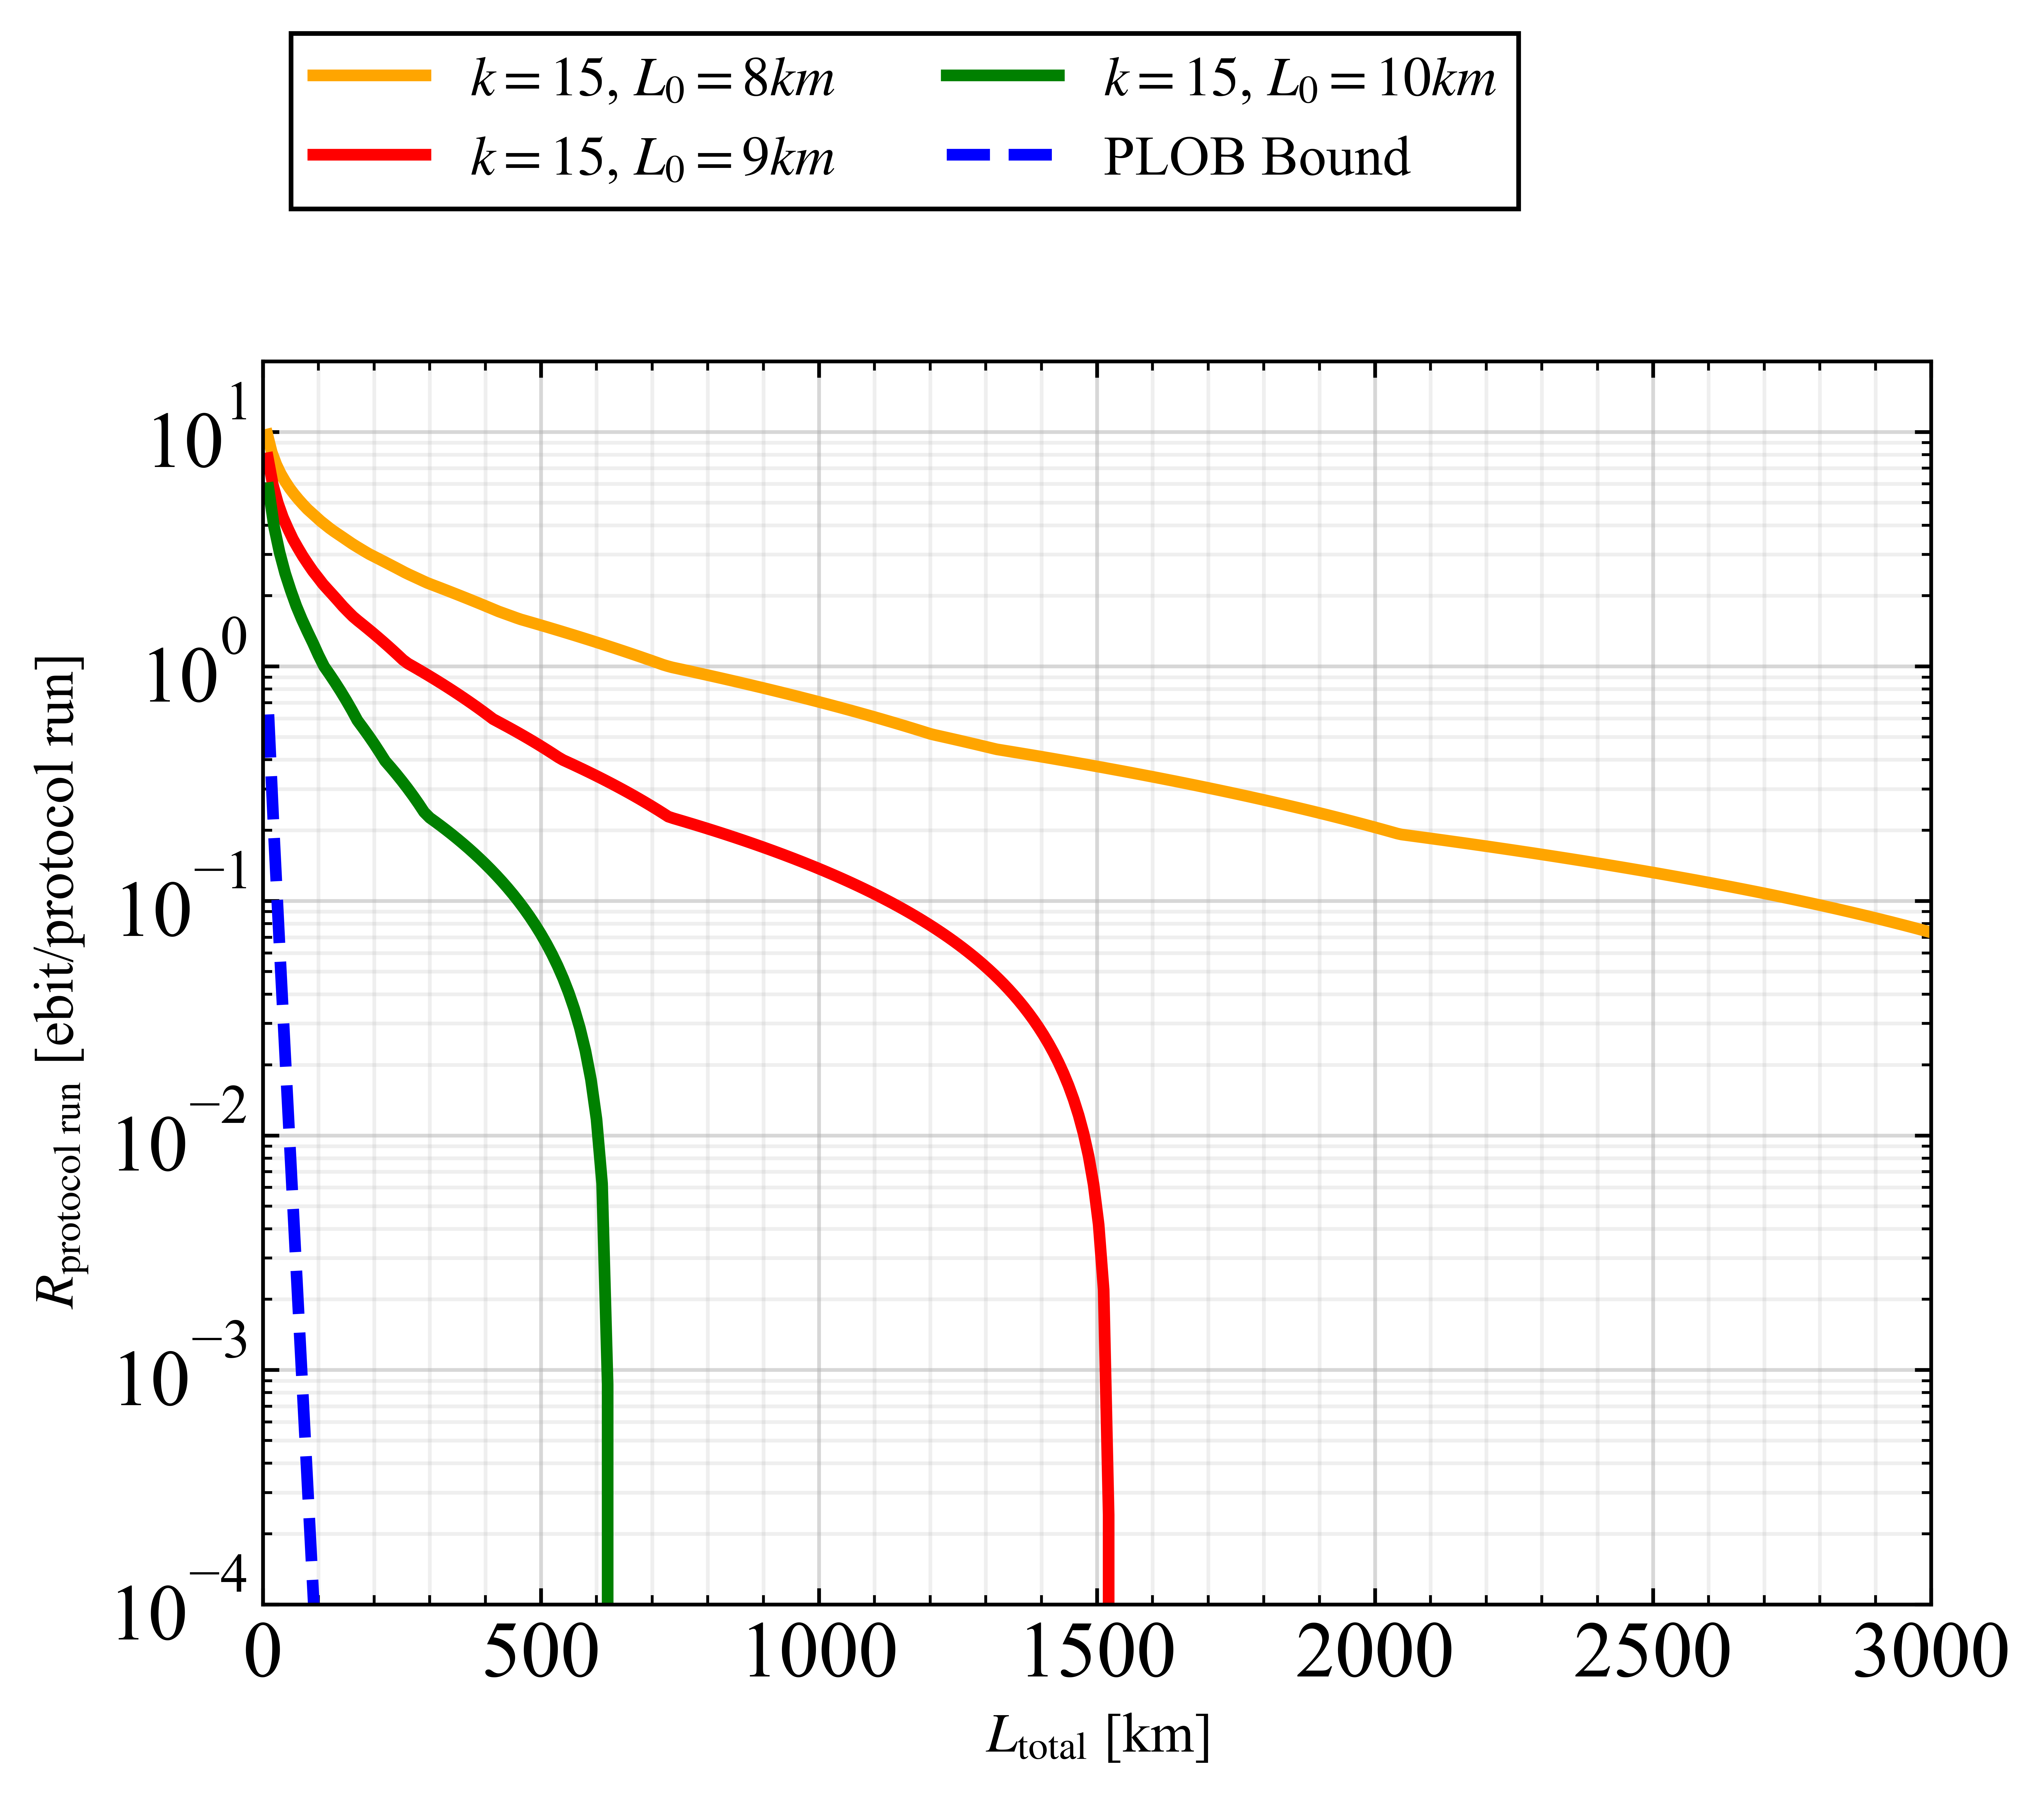

In [3]:
#R_{protocol run}

def main():
    xlist8 = []
    for i in range(375):
        xlist8.append(8*(i+1))

    xlist9 = []
    for i in range(334):
        xlist9.append(9*(i+1))
    
    xlist10 = []
    for i in range(300):
        xlist10.append(10*(i+1))

    df = pd.read_csv('FIG_Data/Rate_vs_Distance_UW2_and_UW3/Rate_vs_Distance_UW3_8km_15.csv', header=None)
    Rate_vs_Distance_UW3_k15_8km = df.values.flatten().tolist()
    Total_Rate_vs_Distance_UW3_k15_8km = [x*15 for x in Rate_vs_Distance_UW3_k15_8km]
    
    df = pd.read_csv('FIG_Data/Rate_vs_Distance_UW2_and_UW3/Rate_vs_Distance_UW3_9km_15.csv', header=None)
    Rate_vs_Distance_UW3_k15_9km = df.values.flatten().tolist()
    Total_Rate_vs_Distance_UW3_k15_9km = [x*15 for x in Rate_vs_Distance_UW3_k15_9km]
    
    df = pd.read_csv('FIG_Data/Rate_vs_Distance_UW2_and_UW3/Rate_vs_Distance_UW3_10km_15.csv', header=None)
    Rate_vs_Distance_UW3_k15_10km = df.values.flatten().tolist()
    Total_Rate_vs_Distance_UW3_k15_10km = [x*15 for x in Rate_vs_Distance_UW3_k15_10km]

    #PLOB bound
    eta_list = [10**(-L/22) for L in xlist10]
    PLOB_rate = [-np.log2(1 - eta) if eta < 1 else 0 for eta in eta_list]
    
    fig = plt.figure(dpi=1200)
    fig_1 = fig.add_subplot(111)
    fig_1.plot(xlist8, Total_Rate_vs_Distance_UW3_k15_8km, label="$k=15$, $L_0=8km$", color="orange", linewidth=2.5)
    fig_1.plot(xlist9, Total_Rate_vs_Distance_UW3_k15_9km, label="$k=15$, $L_0=9km$", color="r", linewidth=2.5)
    fig_1.plot(xlist10, Total_Rate_vs_Distance_UW3_k15_10km, label="$k=15$, $L_0=10km$", color="g", linewidth=2.5)
    fig_1.plot(xlist10, PLOB_rate, label="PLOB Bound", color="blue", linestyle="--", linewidth=2.5)
    fig_1.set_xlabel(r"$L_{\mathrm{total}}$ [km]")
    fig_1.set_ylabel(r"$R_{\mathrm{protocol\ run}}$ [ebit/protocol run]")
    fig_1.legend(ncol=2, bbox_to_anchor=(0, 1.1, 1., 0.102), loc=3)
    fig_1.grid(which='minor', alpha=0.2)
    fig_1.grid(which='major', alpha=0.5)
    fig_1.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    #fig_1.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
    plt.xlim(0, 3000)
    plt.ylim(1e-4, 20)
    plt.yscale("log")
    plt.show()

    fig.savefig('QCNCFIG9B01.png', bbox_inches="tight", pad_inches=0.05) 

if __name__ == "__main__":
    main()